In [1]:
# load the data into a data frame

import pandas as pd
df = pd.read_csv("winequality-red.csv",delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
# how many quality values in the dataset
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [4]:
# there are only 6 values for quality in the data set so we will map all quality values from 0 to 5
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [5]:
# shuffling and splitting the data into 1000 samples train and 599 for validation "hold-out set"
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows for training
df_train = df.head(1000)

# bottom 599 for validation
df_test = df.tail(599)

In [6]:
# train a decision tree model
from sklearn import tree
from sklearn import metrics

# initialze decision tree classifier classs with max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the features I want to train on
cols = df_train.columns[:-1]

# train the model
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [7]:
# generate prediction on the training set
train_predictions = clf.predict(df_train[cols])

In [8]:
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

In [9]:
# calculating the accuracy on the prediction of train
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

# calculating the accuracy on the predictio of test
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [10]:
print(f"Accuracy on the Training set: {train_accuracy}.\nAccuracy on the Test set: {test_accuracy}.")

Accuracy on the Training set: 0.599.
Accuracy on the Test set: 0.5559265442404007.


In [11]:
# with max_depth of 7
clf_7 = tree.DecisionTreeClassifier(max_depth=7)
clf_7.fit(df_train[cols],df_train.quality)
train_predictions_7 = clf_7.predict(df_train[cols])
test_predictions_7 = clf_7.predict(df_test[cols])
train_accuracy_7 = metrics.accuracy_score(
    df_train.quality, train_predictions_7
)
test_accuracy_7 = metrics.accuracy_score(
    df_test.quality, test_predictions_7
)
print(f"Accuracy on the Training set: {train_accuracy_7}.\nAccuracy on the Test set: {test_accuracy_7}.")

Accuracy on the Training set: 0.764.
Accuracy on the Test set: 0.6210350584307178.


In [12]:
# import liberaries for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# global size of label text
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

%matplotlib inline

# lists to store accuracies
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over different depth values
for depth in range (1,25):
    # initialze decision tree classifier classs
    clf_7 = tree.DecisionTreeClassifier(max_depth=depth)
    # choose the features I want to train on
    cols = df_train.columns[:-1]
    # train the model
    clf_7.fit(df_train[cols],df_train.quality)
    # generate prediction on the training set
    train_predictions_7 = clf_7.predict(df_train[cols])
    # generate predictions on the test set
    test_predictions_7 = clf_7.predict(df_test[cols])
    # calculating the accuracy on the prediction of train
    train_accuracy_7 = metrics.accuracy_score(
        df_train.quality, train_predictions_7
)
    # calculating the accuracy on the predictio of test
    test_accuracy_7 = metrics.accuracy_score(
        df_test.quality, test_predictions_7
)
    print(f"Accuracy on the Training set: {train_accuracy_7}.\nAccuracy on the Test set: {test_accuracy_7}.")
    train_accuracies.append(train_accuracy_7)
    test_accuracies.append(test_accuracy_7)    

Accuracy on the Training set: 0.57.
Accuracy on the Test set: 0.5442404006677797.
Accuracy on the Training set: 0.57.
Accuracy on the Test set: 0.5442404006677797.
Accuracy on the Training set: 0.599.
Accuracy on the Test set: 0.5559265442404007.
Accuracy on the Training set: 0.637.
Accuracy on the Test set: 0.5826377295492488.
Accuracy on the Training set: 0.663.
Accuracy on the Test set: 0.6060100166944908.
Accuracy on the Training set: 0.714.
Accuracy on the Test set: 0.6060100166944908.
Accuracy on the Training set: 0.764.
Accuracy on the Test set: 0.6227045075125208.
Accuracy on the Training set: 0.821.
Accuracy on the Test set: 0.6310517529215359.
Accuracy on the Training set: 0.853.
Accuracy on the Test set: 0.6143572621035058.
Accuracy on the Training set: 0.89.
Accuracy on the Test set: 0.6210350584307178.
Accuracy on the Training set: 0.924.
Accuracy on the Test set: 0.6243739565943238.
Accuracy on the Training set: 0.939.
Accuracy on the Test set: 0.6176961602671118.
Accurac

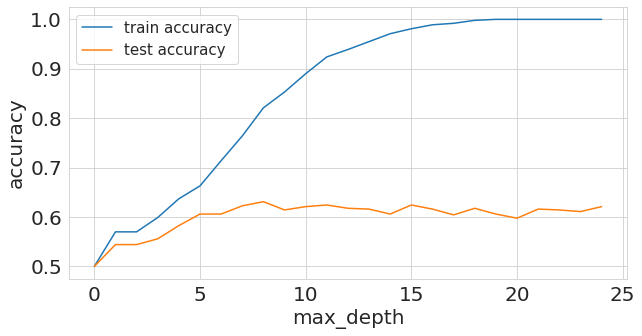

In [13]:
# plotting the models' accuracies

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="train accuracy")
plt.plot(test_accuracies,label="test accuracy")
plt.legend(loc="upper left",prop={"size":15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth",size=20)
plt.ylabel("accuracy",size=20)
plt.show()

the best **max_depth** value is 14 as after that the train accuracy increase but the model start to overfit the training data

Text(0, 0.5, 'count')

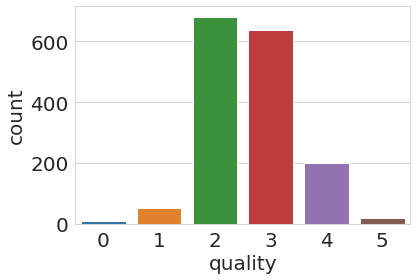

In [15]:
# the distribution of labels
b = sns.countplot(x="quality",data=df)
b.set_xlabel("quality",fontsize=20)
b.set_ylabel("count",fontsize=20)

The data is skewed so we can't use simple KFold and we should use Stratified KFold instead